<a href="https://colab.research.google.com/github/ParamitaDas18/ML_Lab_Codes/blob/main/Q1_car_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

car_dataset.csv  sample_data


=== CO2 Emission Prediction ===
R² Score: -29.136
MSE: 13065.667
MAE: 91.000


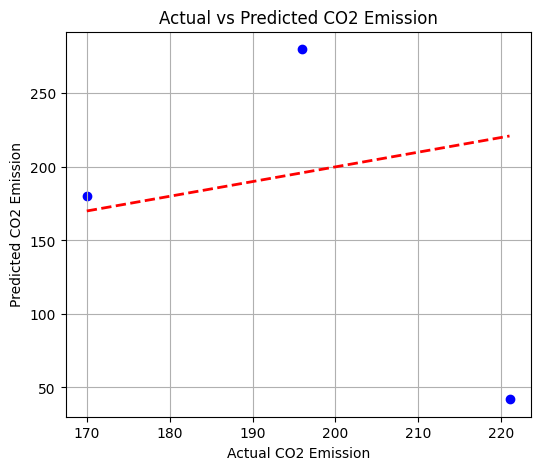


=== Used Car Price Prediction ===
R² Score: -3.163
MSE: 17577297.085
MAE: 3697.179


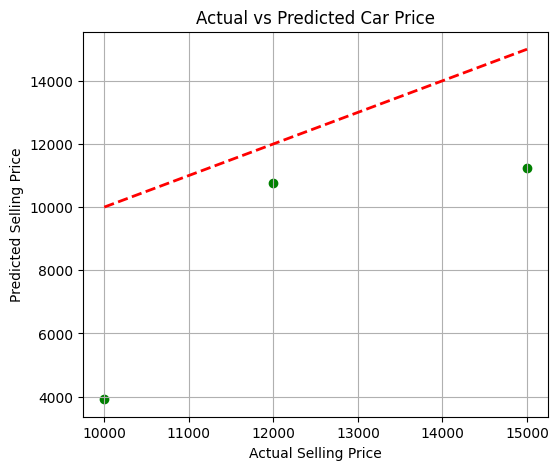

In [5]:
# --- Linear Regression for CO2 Emissions and Used Car Price ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ============================================================
# 1. CO2 Emission Prediction
# ============================================================

# Load dataset
df_co2 = pd.read_csv('car_dataset.csv', encoding='latin-1')

# Clean data (remove non-numeric rows at the end)
df_co2 = df_co2[pd.to_numeric(df_co2['Engine_Size'], errors='coerce').notna()]


# Features & target
X_co2 = df_co2[['Engine_Size', 'Cylinders', 'Fuel_Consumption']]
y_co2 = df_co2['CO2_Emissions']

# Convert features and target to numeric, coercing errors
X_co2 = X_co2.apply(pd.to_numeric, errors='coerce')
y_co2 = pd.to_numeric(y_co2, errors='coerce')

# Drop rows with NaN values after coercion
X_co2.dropna(inplace=True)
y_co2.dropna(inplace=True)

# Ensure that X_co2 and y_co2 have the same index after dropping NaNs
y_co2 = y_co2.loc[X_co2.index]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_co2, y_co2, test_size=0.3, random_state=42)

# Model
model_co2 = LinearRegression()
model_co2.fit(X_train, y_train)

# Predictions
y_pred = model_co2.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("=== CO2 Emission Prediction ===")
print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"MAE: {mae:.3f}")

# Plot Actual vs Predicted
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual CO2 Emission')
plt.ylabel('Predicted CO2 Emission')
plt.title('Actual vs Predicted CO2 Emission')
plt.grid(True)
plt.show()

# ============================================================
# 2. Used Car Selling Price Prediction
# ============================================================

# Load dataset
df_car = pd.read_csv('car_dataset.csv', encoding='latin-1') # Assuming 'car_dataset.csv' contains used car data

# Clean data (remove non-numeric rows at the end)
df_car = df_car[pd.to_numeric(df_car['Year'], errors='coerce').notna()]


# Features & target
X_car = df_car[['Year', 'Mileage', 'Engine_Size', 'Horsepower']]
y_car = df_car['Selling_Price']

# Convert features and target to numeric, coercing errors
X_car = X_car.apply(pd.to_numeric, errors='coerce')
y_car = pd.to_numeric(y_car, errors='coerce')

# Drop rows with NaN values after coercion
X_car.dropna(inplace=True)
y_car.dropna(inplace=True)

# Ensure that X_car and y_car have the same index after dropping NaNs
y_car = y_car.loc[X_car.index]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_car, y_car, test_size=0.3, random_state=42)

# Model
model_car = LinearRegression()
model_car.fit(X_train, y_train)

# Predictions
y_pred = model_car.predict(X_test)

# Metrics
r2_car = r2_score(y_test, y_pred)
mse_car = mean_squared_error(y_test, y_pred)
mae_car = mean_absolute_error(y_test, y_pred)

print("\n=== Used Car Price Prediction ===")
print(f"R² Score: {r2_car:.3f}")
print(f"MSE: {mse_car:.3f}")
print(f"MAE: {mae_car:.3f}")

# Plot Actual vs Predicted
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Car Price')
plt.grid(True)
plt.show()